In [68]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
#from matplotlib import cm
from matplotlib import rcParams, cycler

In [64]:
aqi = pd.read_csv('data/aqi_df.csv', usecols={'State Name',
                                            'county Name',
                                            'Date',
                                            'AQI',
                                            'Category',
                                            'Defining Parameter',
                                            'Defining Site',
                                            'Number of Sites Reporting'})

# set columns to strings to keep leading zeros
dtype_dic= {'State Code':str,
            'County Code':str,
            'Site Number':str}
dtype = dtype_dic

# monitors=pd.read_csv('data/aqs_monitors.csv', usecols ={'State Code',
#                                                         'County Code',
#                                                         'Site Number',
#                                                         'Latitude',
#                                                         'Longitude',
#                                                         'Monitor Type'},
#                     dtype=dtype_dic)

In [3]:
aqi.head()

,State Name,county Name,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,DeKalb,2021-01-01,30,Good,Ozone,01-049-9991,1
1,Alabama,DeKalb,2021-01-02,27,Good,Ozone,01-049-9991,1
2,Alabama,DeKalb,2021-01-03,34,Good,Ozone,01-049-9991,1
3,Alabama,DeKalb,2021-01-04,36,Good,Ozone,01-049-9991,1
4,Alabama,DeKalb,2021-01-05,31,Good,Ozone,01-049-9991,1


In [4]:
aqi['Date'] = pd.to_datetime(aqi['Date'])

In [5]:
aqi['Date'].dtypes

dtype('<M8[ns]')

In [6]:
aqi['Category'].unique()

array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups',
       'Very Unhealthy', 'Unhealthy', 'Hazardous'], dtype=object)

In [7]:
aqi_unhealthy = aqi[aqi['AQI'] > 150]
aqi_unhealthy.head()

,State Name,county Name,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
623,Arizona,Maricopa,2021-01-01,272,Very Unhealthy,PM2.5,04-013-0019,24
627,Arizona,Maricopa,2021-01-05,176,Unhealthy,Ozone,04-013-5100,24
628,Arizona,Maricopa,2021-01-06,156,Unhealthy,Ozone,04-013-5100,24
631,Arizona,Maricopa,2021-01-09,154,Unhealthy,Ozone,04-013-5100,24
632,Arizona,Maricopa,2021-01-10,169,Unhealthy,Ozone,04-013-5100,24


In [8]:
len(aqi_unhealthy)

172850

In [9]:
aqi_unhealthy.loc[:, ('year')] = aqi_unhealthy.loc[:, ('Date')].dt.year

/Users/Grace/opt/anaconda3/envs/eds222/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [41]:
aqi_unhealthy.head()
aqi_unhealthy['Defining Parameter'].unique()

array(['PM2.5', 'Ozone', 'PM10', 'SO2', 'CO', 'NO2'], dtype=object)

In [44]:
aqi_ozone_unhealthy = aqi_unhealthy[aqi_unhealthy['Defining Parameter'] == 'Ozone']
aqi_pm25_unhealthy = aqi_unhealthy[aqi_unhealthy['Defining Parameter'] == 'PM2.5']
aqi_pm10_unhealthy = aqi_unhealthy[aqi_unhealthy['Defining Parameter'] == 'PM10']
aqi_SO2_unhealthy = aqi_unhealthy[aqi_unhealthy['Defining Parameter'] == 'SO2']
aqi_CO_unhealthy = aqi_unhealthy[aqi_unhealthy['Defining Parameter'] == 'CO']
aqi_NO2_unhealthy = aqi_unhealthy[aqi_unhealthy['Defining Parameter'] == 'NO2']

In [31]:
counts_aqi_unhealthy = aqi_unhealthy.groupby('year').size().reset_index(name='count')
#counts_aqi_unhealthy

<AxesSubplot:title={'center':'Number of Days with an AQI above 150 in the US \nfrom 1980-2021'}, xlabel='year'>

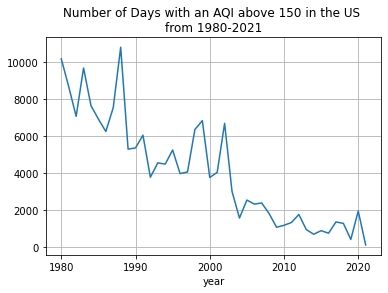

In [12]:
counts_aqi_unhealthy.plot(x = 'year', 
                          y = 'count', 
                          legend = False, 
                          grid = True, 
                          title = 'Number of Days with an AQI above 150 in the US \nfrom 1980-2021')


### Plot of Number of AQI Readings above 150 by Year in the US

Text(0, 0.5, 'Count')

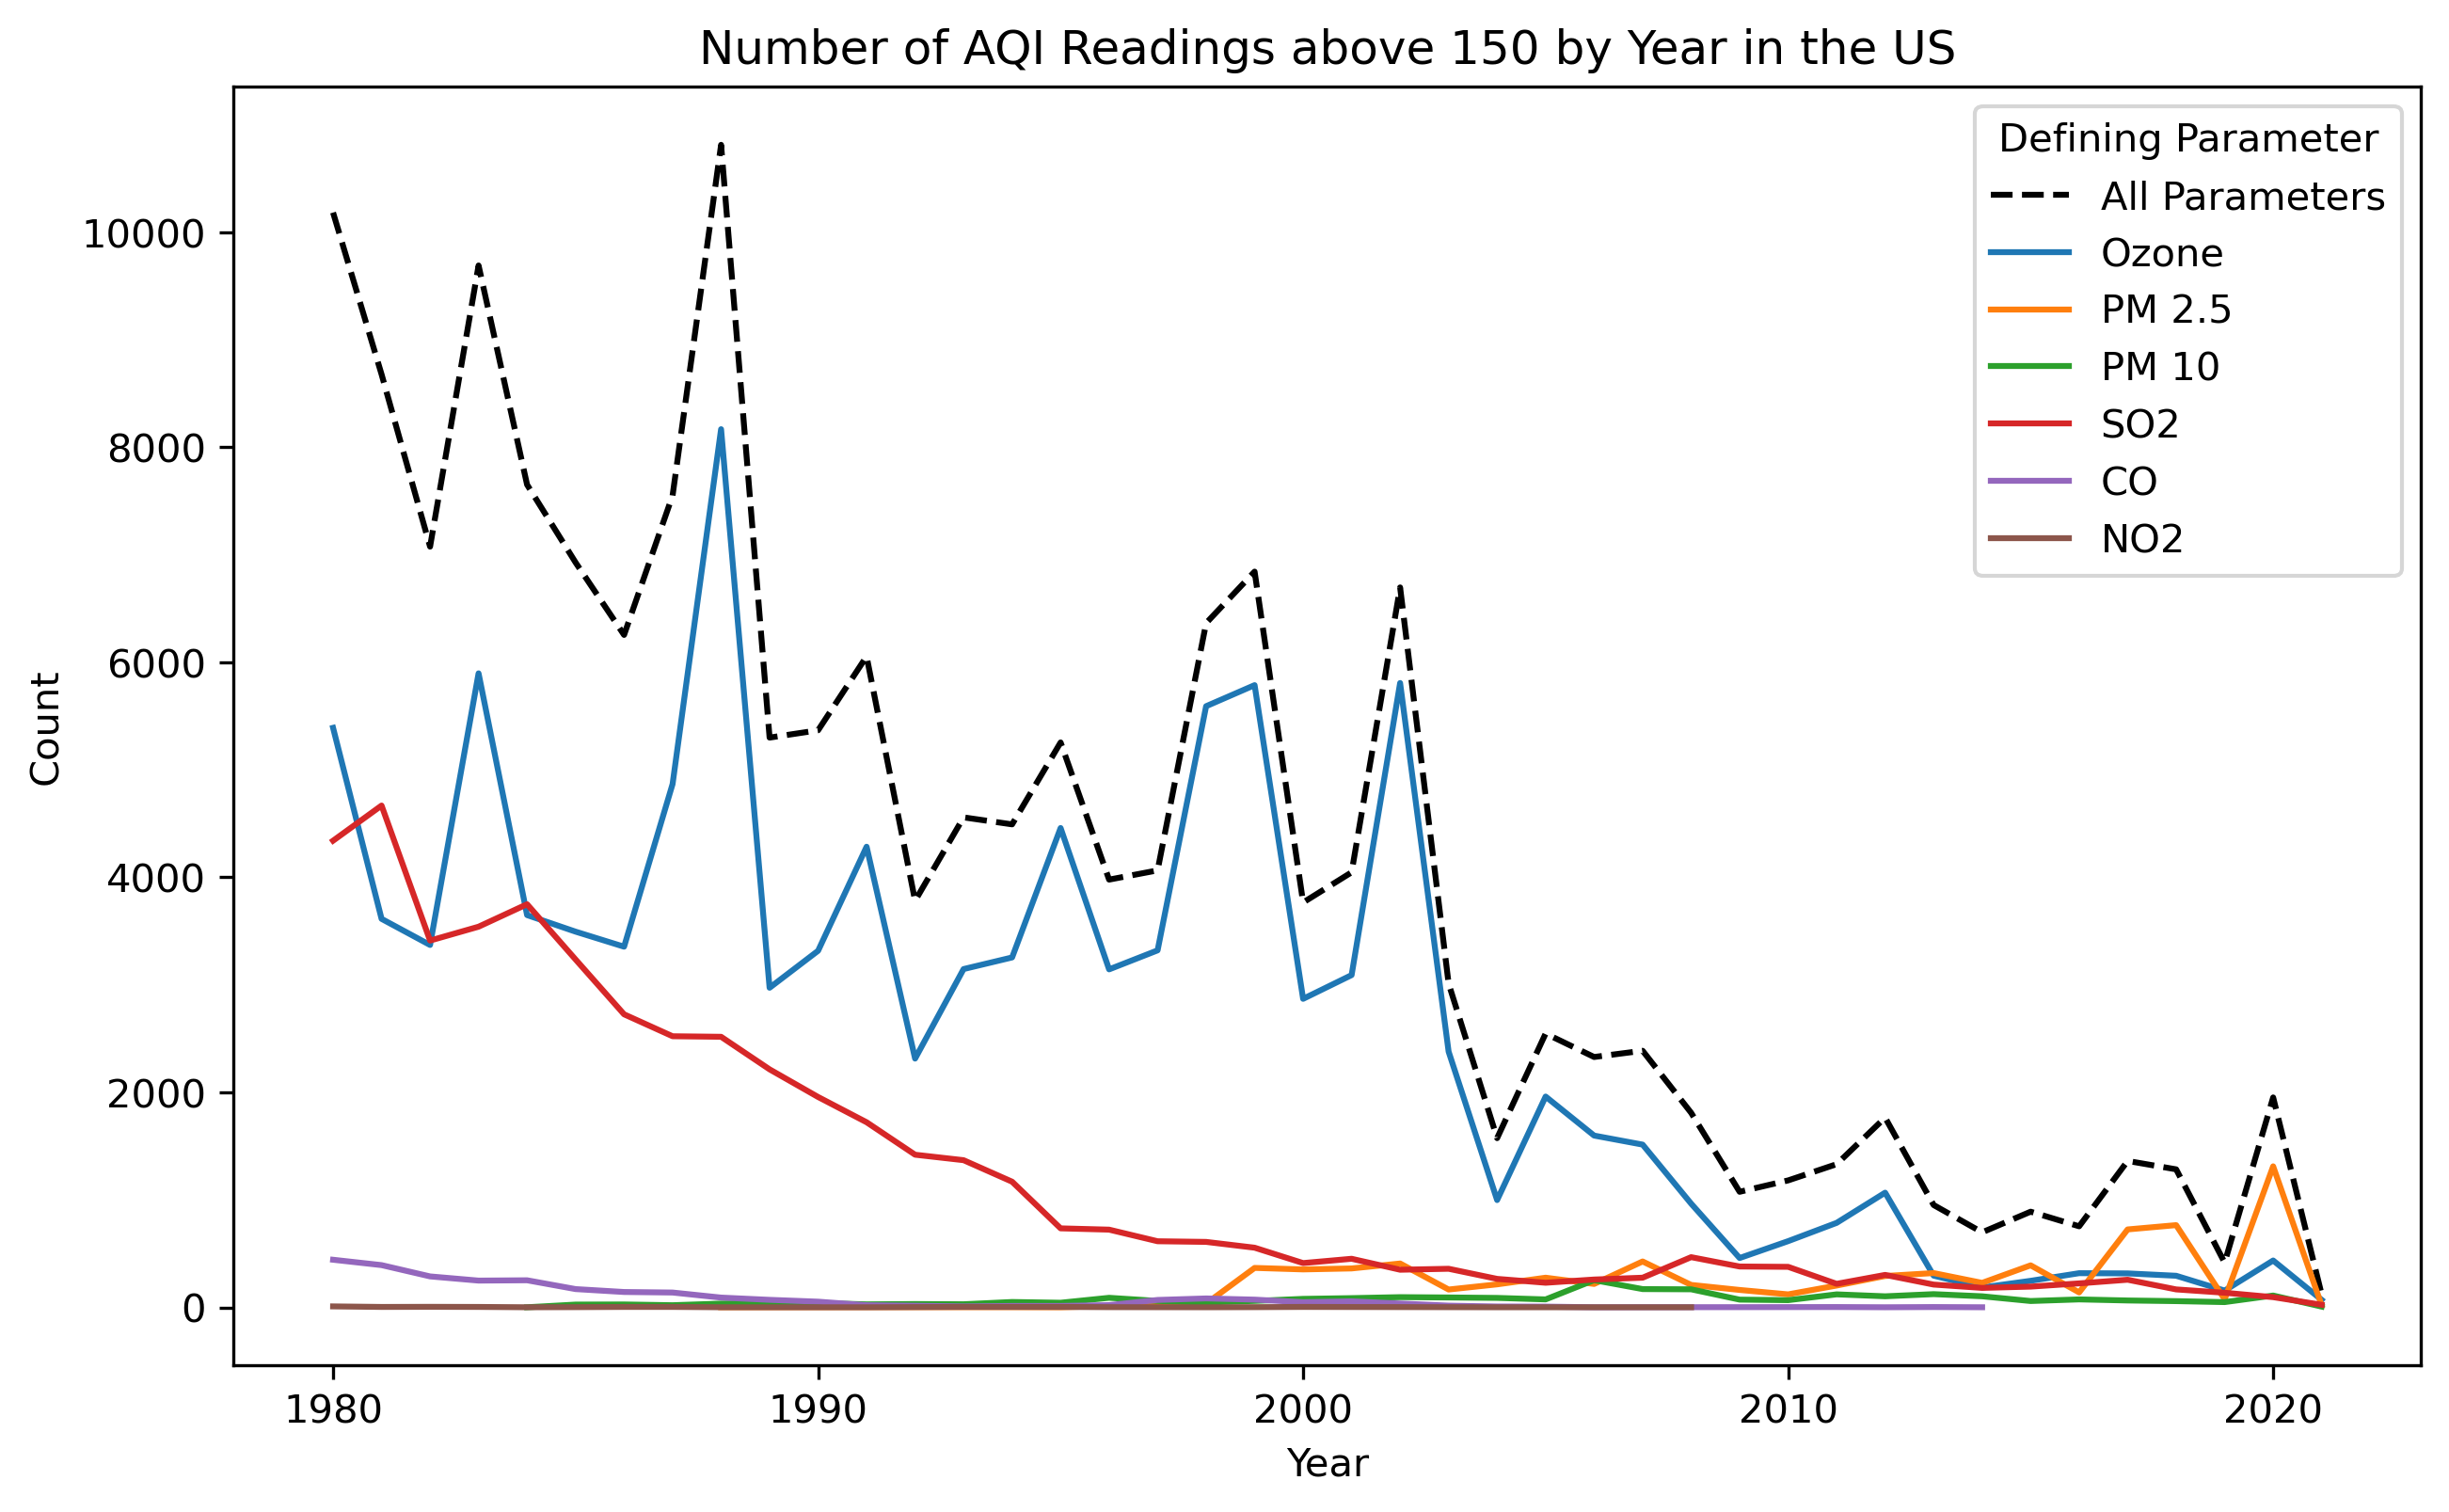

In [108]:
fig, ax = plt.subplots(figsize=(10,6), dpi = 300)

plt.plot(counts_aqi_unhealthy['year'], counts_aqi_unhealthy['count'],
         label = 'All Parameters', ls = 'dashed', color = 'black')
plt.plot(aqi_ozone_unhealthy.groupby('year').size().reset_index(name='count')['year'], 
         aqi_ozone_unhealthy.groupby('year').size().reset_index(name='count')['count'],
         label = 'Ozone')
plt.plot(aqi_pm25_unhealthy.groupby('year').size().reset_index(name='count')['year'], 
         aqi_pm25_unhealthy.groupby('year').size().reset_index(name='count')['count'],
         label = 'PM 2.5')
plt.plot(aqi_pm10_unhealthy.groupby('year').size().reset_index(name='count')['year'], 
         aqi_pm10_unhealthy.groupby('year').size().reset_index(name='count')['count'],
         label = 'PM 10')
plt.plot(aqi_SO2_unhealthy.groupby('year').size().reset_index(name='count')['year'], 
         aqi_SO2_unhealthy.groupby('year').size().reset_index(name='count')['count'],
         label = 'SO2')
plt.plot(aqi_CO_unhealthy.groupby('year').size().reset_index(name='count')['year'], 
         aqi_CO_unhealthy.groupby('year').size().reset_index(name='count')['count'],
         label = 'CO')
plt.plot(aqi_NO2_unhealthy.groupby('year').size().reset_index(name='count')['year'], 
         aqi_NO2_unhealthy.groupby('year').size().reset_index(name='count')['count'],
         label = 'NO2')

ax.legend(title = 'Defining Parameter')
plt.title('Number of AQI Readings above 150 by Year in the US')
plt.xlabel('Year')
plt.ylabel('Count')

## Number of AQI Readings above 150 by Year in California

In [109]:
aqi_unhealthy_ca = aqi_unhealthy[aqi_unhealthy['State Name'] == 'California']

In [110]:
aqi_ozone_unhealthy_ca = aqi_unhealthy_ca[aqi_unhealthy_ca['Defining Parameter'] == 'Ozone']
aqi_pm25_unhealthy_ca = aqi_unhealthy_ca[aqi_unhealthy_ca['Defining Parameter'] == 'PM2.5']
aqi_pm10_unhealthy_ca = aqi_unhealthy_ca[aqi_unhealthy_ca['Defining Parameter'] == 'PM10']
aqi_SO2_unhealthy_ca = aqi_unhealthy_ca[aqi_unhealthy_ca['Defining Parameter'] == 'SO2']
aqi_CO_unhealthy_ca = aqi_unhealthy_ca[aqi_unhealthy_ca['Defining Parameter'] == 'CO']
aqi_NO2_unhealthy_ca = aqi_unhealthy_ca[aqi_unhealthy_ca['Defining Parameter'] == 'NO2']

Text(0, 0.5, 'Count')

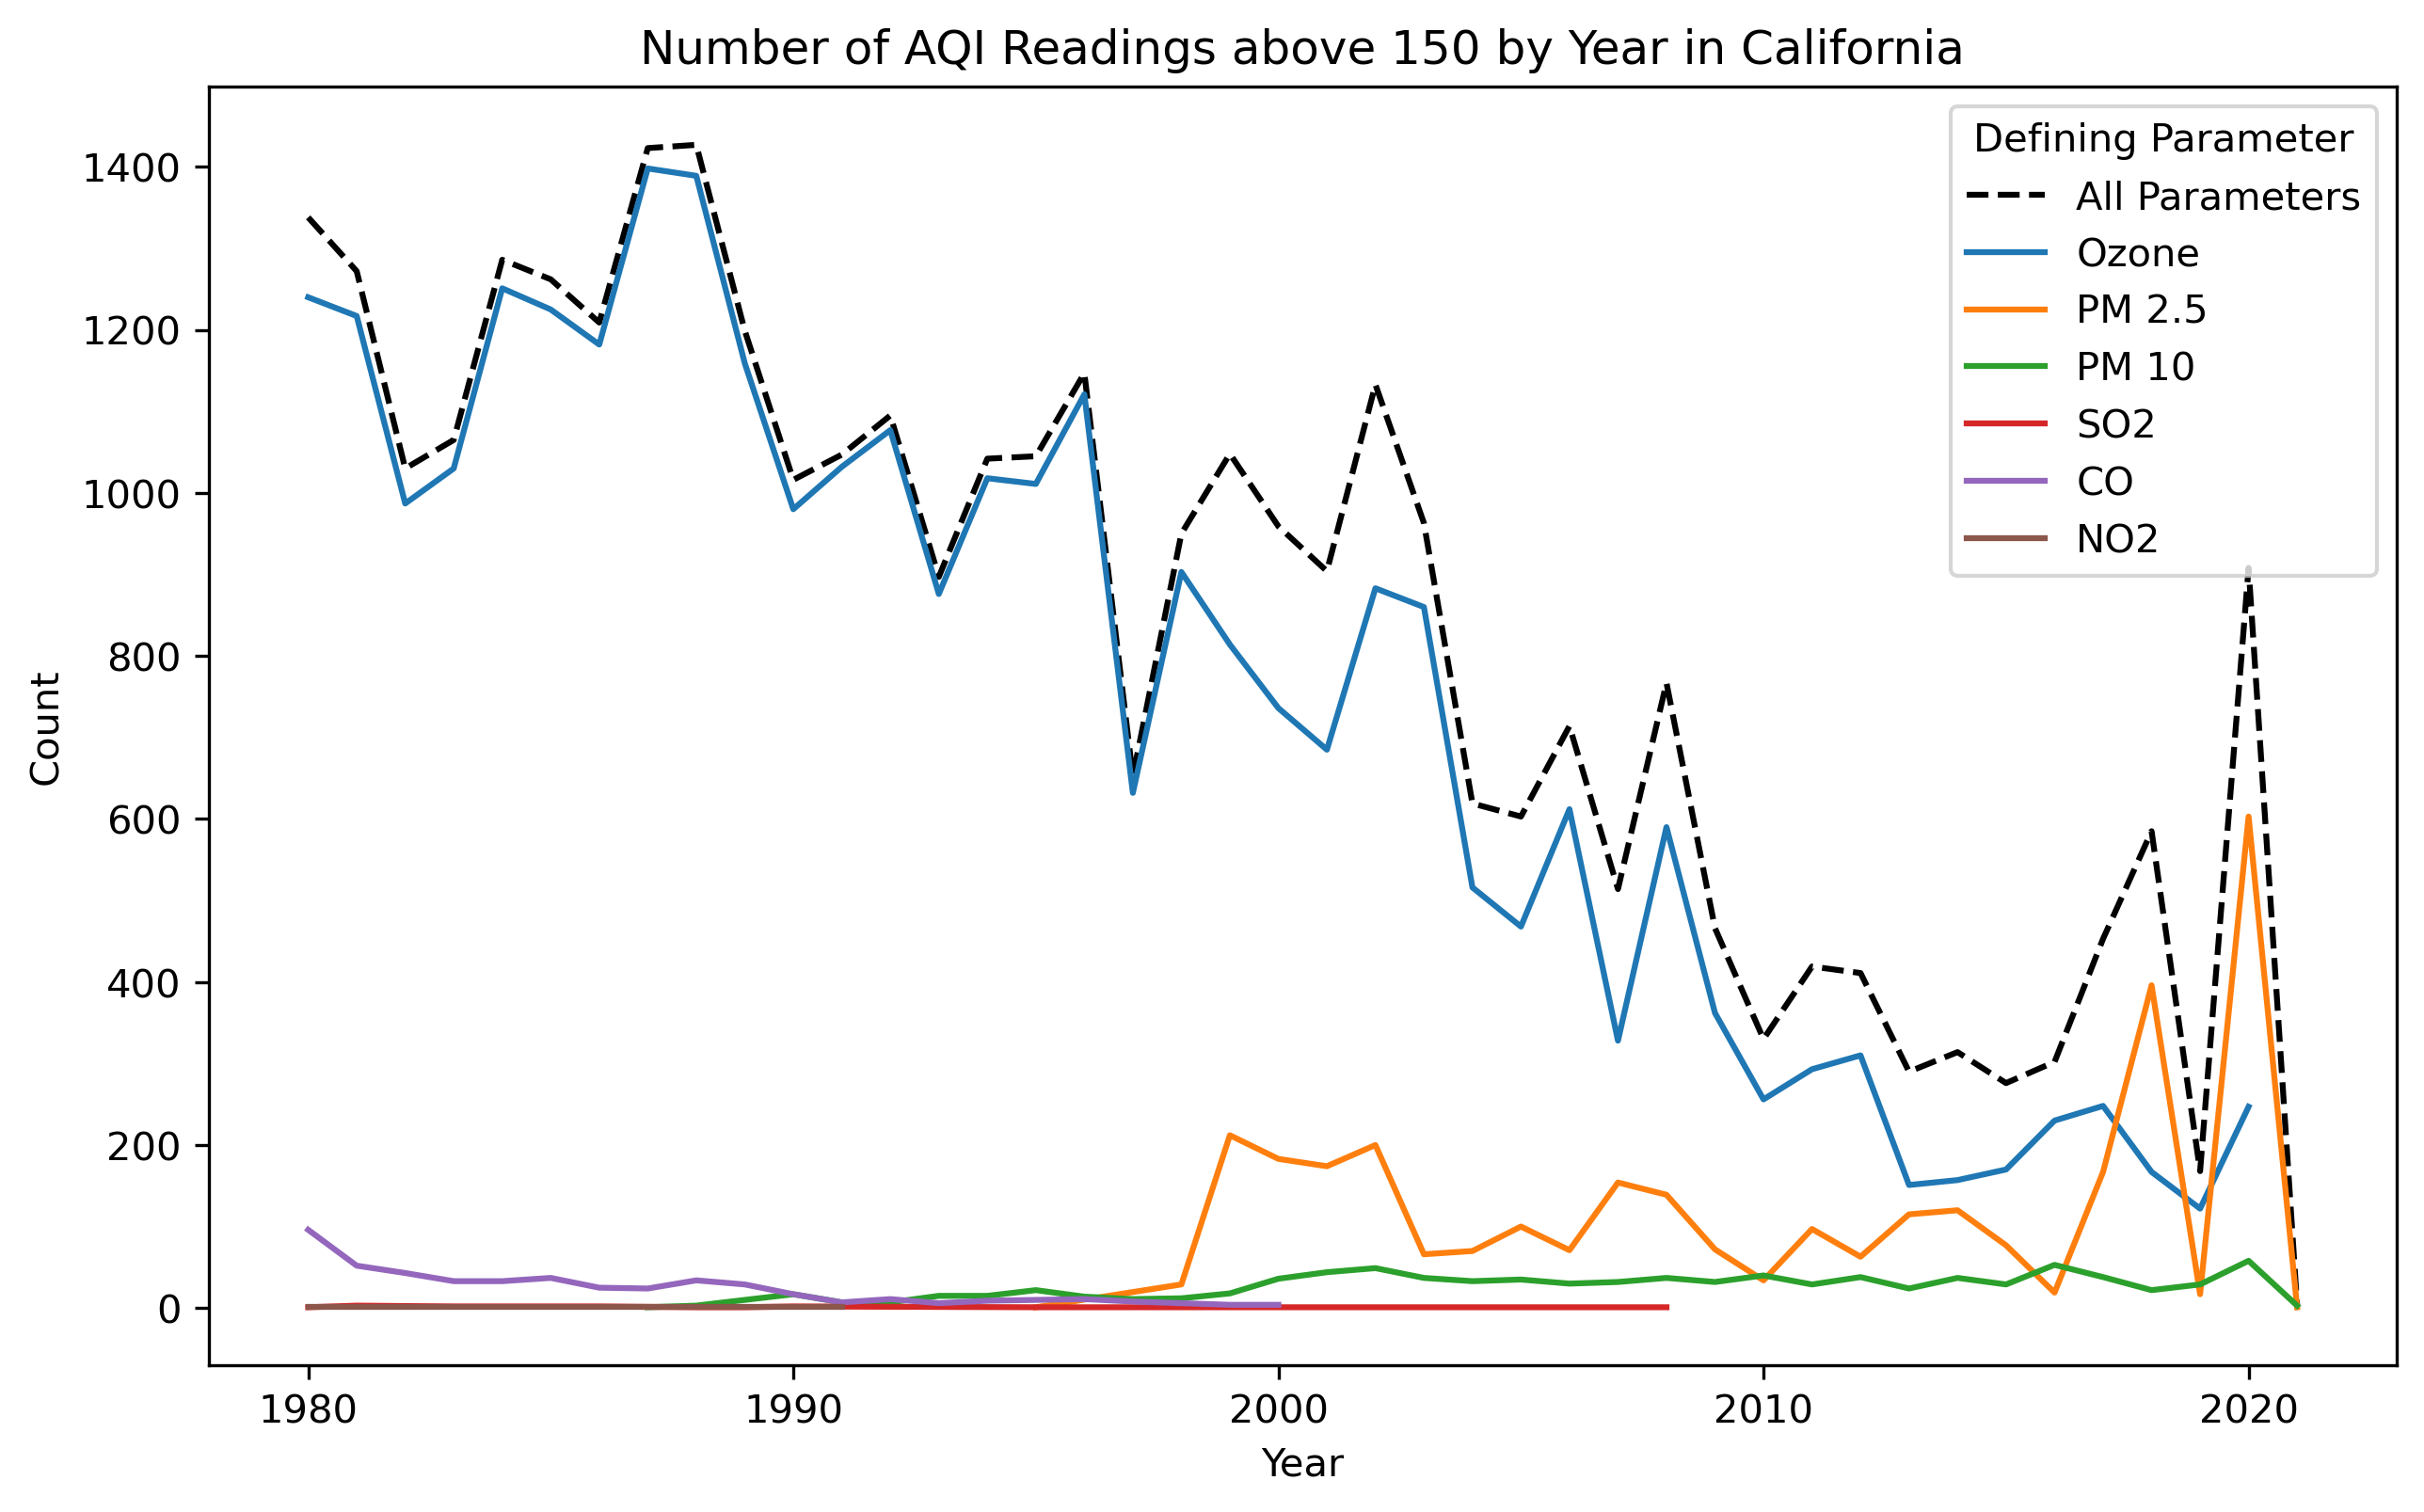

In [111]:
fig, ax = plt.subplots(figsize=(10,6), dpi = 300)

plt.plot(aqi_unhealthy_ca.groupby('year').size().reset_index(name='count')['year'], 
         aqi_unhealthy_ca.groupby('year').size().reset_index(name='count')['count'],
         label = 'All Parameters', ls = 'dashed', color = 'black')
plt.plot(aqi_ozone_unhealthy_ca.groupby('year').size().reset_index(name='count')['year'], 
         aqi_ozone_unhealthy_ca.groupby('year').size().reset_index(name='count')['count'],
         label = 'Ozone')
plt.plot(aqi_pm25_unhealthy_ca.groupby('year').size().reset_index(name='count')['year'], 
         aqi_pm25_unhealthy_ca.groupby('year').size().reset_index(name='count')['count'],
         label = 'PM 2.5')
plt.plot(aqi_pm10_unhealthy_ca.groupby('year').size().reset_index(name='count')['year'], 
         aqi_pm10_unhealthy_ca.groupby('year').size().reset_index(name='count')['count'],
         label = 'PM 10')
plt.plot(aqi_SO2_unhealthy_ca.groupby('year').size().reset_index(name='count')['year'], 
         aqi_SO2_unhealthy_ca.groupby('year').size().reset_index(name='count')['count'],
         label = 'SO2')
plt.plot(aqi_CO_unhealthy_ca.groupby('year').size().reset_index(name='count')['year'], 
         aqi_CO_unhealthy_ca.groupby('year').size().reset_index(name='count')['count'],
         label = 'CO')
plt.plot(aqi_NO2_unhealthy_ca.groupby('year').size().reset_index(name='count')['year'], 
         aqi_NO2_unhealthy_ca.groupby('year').size().reset_index(name='count')['count'],
         label = 'NO2')

ax.legend(title = 'Defining Parameter')
plt.title('Number of AQI Readings above 150 by Year in California')
plt.xlabel('Year')
plt.ylabel('Count')

## What are the actual readings of AQI above 150 in California?

In [127]:
aqi_ca = aqi[aqi['State Name'] == 'California']
aqi_ca_pm25 = aqi_ca[aqi_ca['Defining Parameter'] == 'PM2.5']
aqi_ca_pm25['Year'] = pd.DatetimeIndex(aqi_ca_pm25['Date']).year
aqi_ca_pm25

/var/folders/7s/s4r1mxwd3mx14nz68dn40ljm0000gn/T/ipykernel_11384/1814326104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_ca_pm25['Year'] = pd.DatetimeIndex(aqi_ca_pm25['Date']).year


,State Name,county Name,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Year
2019,California,Colusa,2021-01-16,10,Good,PM2.5,06-011-0007,1,2021
2020,California,Colusa,2021-01-17,0,Good,PM2.5,06-011-0007,1,2021
2021,California,Colusa,2021-01-18,0,Good,PM2.5,06-011-0007,1,2021
2022,California,Colusa,2021-01-19,7,Good,PM2.5,06-011-0007,1,2021
2023,California,Colusa,2021-01-20,32,Good,PM2.5,06-011-0007,1,2021
...,...,...,...,...,...,...,...,...,...
9687510,California,San Benito,1988-03-12,41,Good,PM2.5,06-069-0003,1,1988
9687678,California,San Benito,1988-08-27,47,Good,PM2.5,06-069-0003,2,1988
9687780,California,San Benito,1988-12-07,42,Good,PM2.5,06-069-0003,2,1988
9687876,California,San Bernardino,1988-03-12,59,Moderate,PM2.5,06-071-9010,12,1988


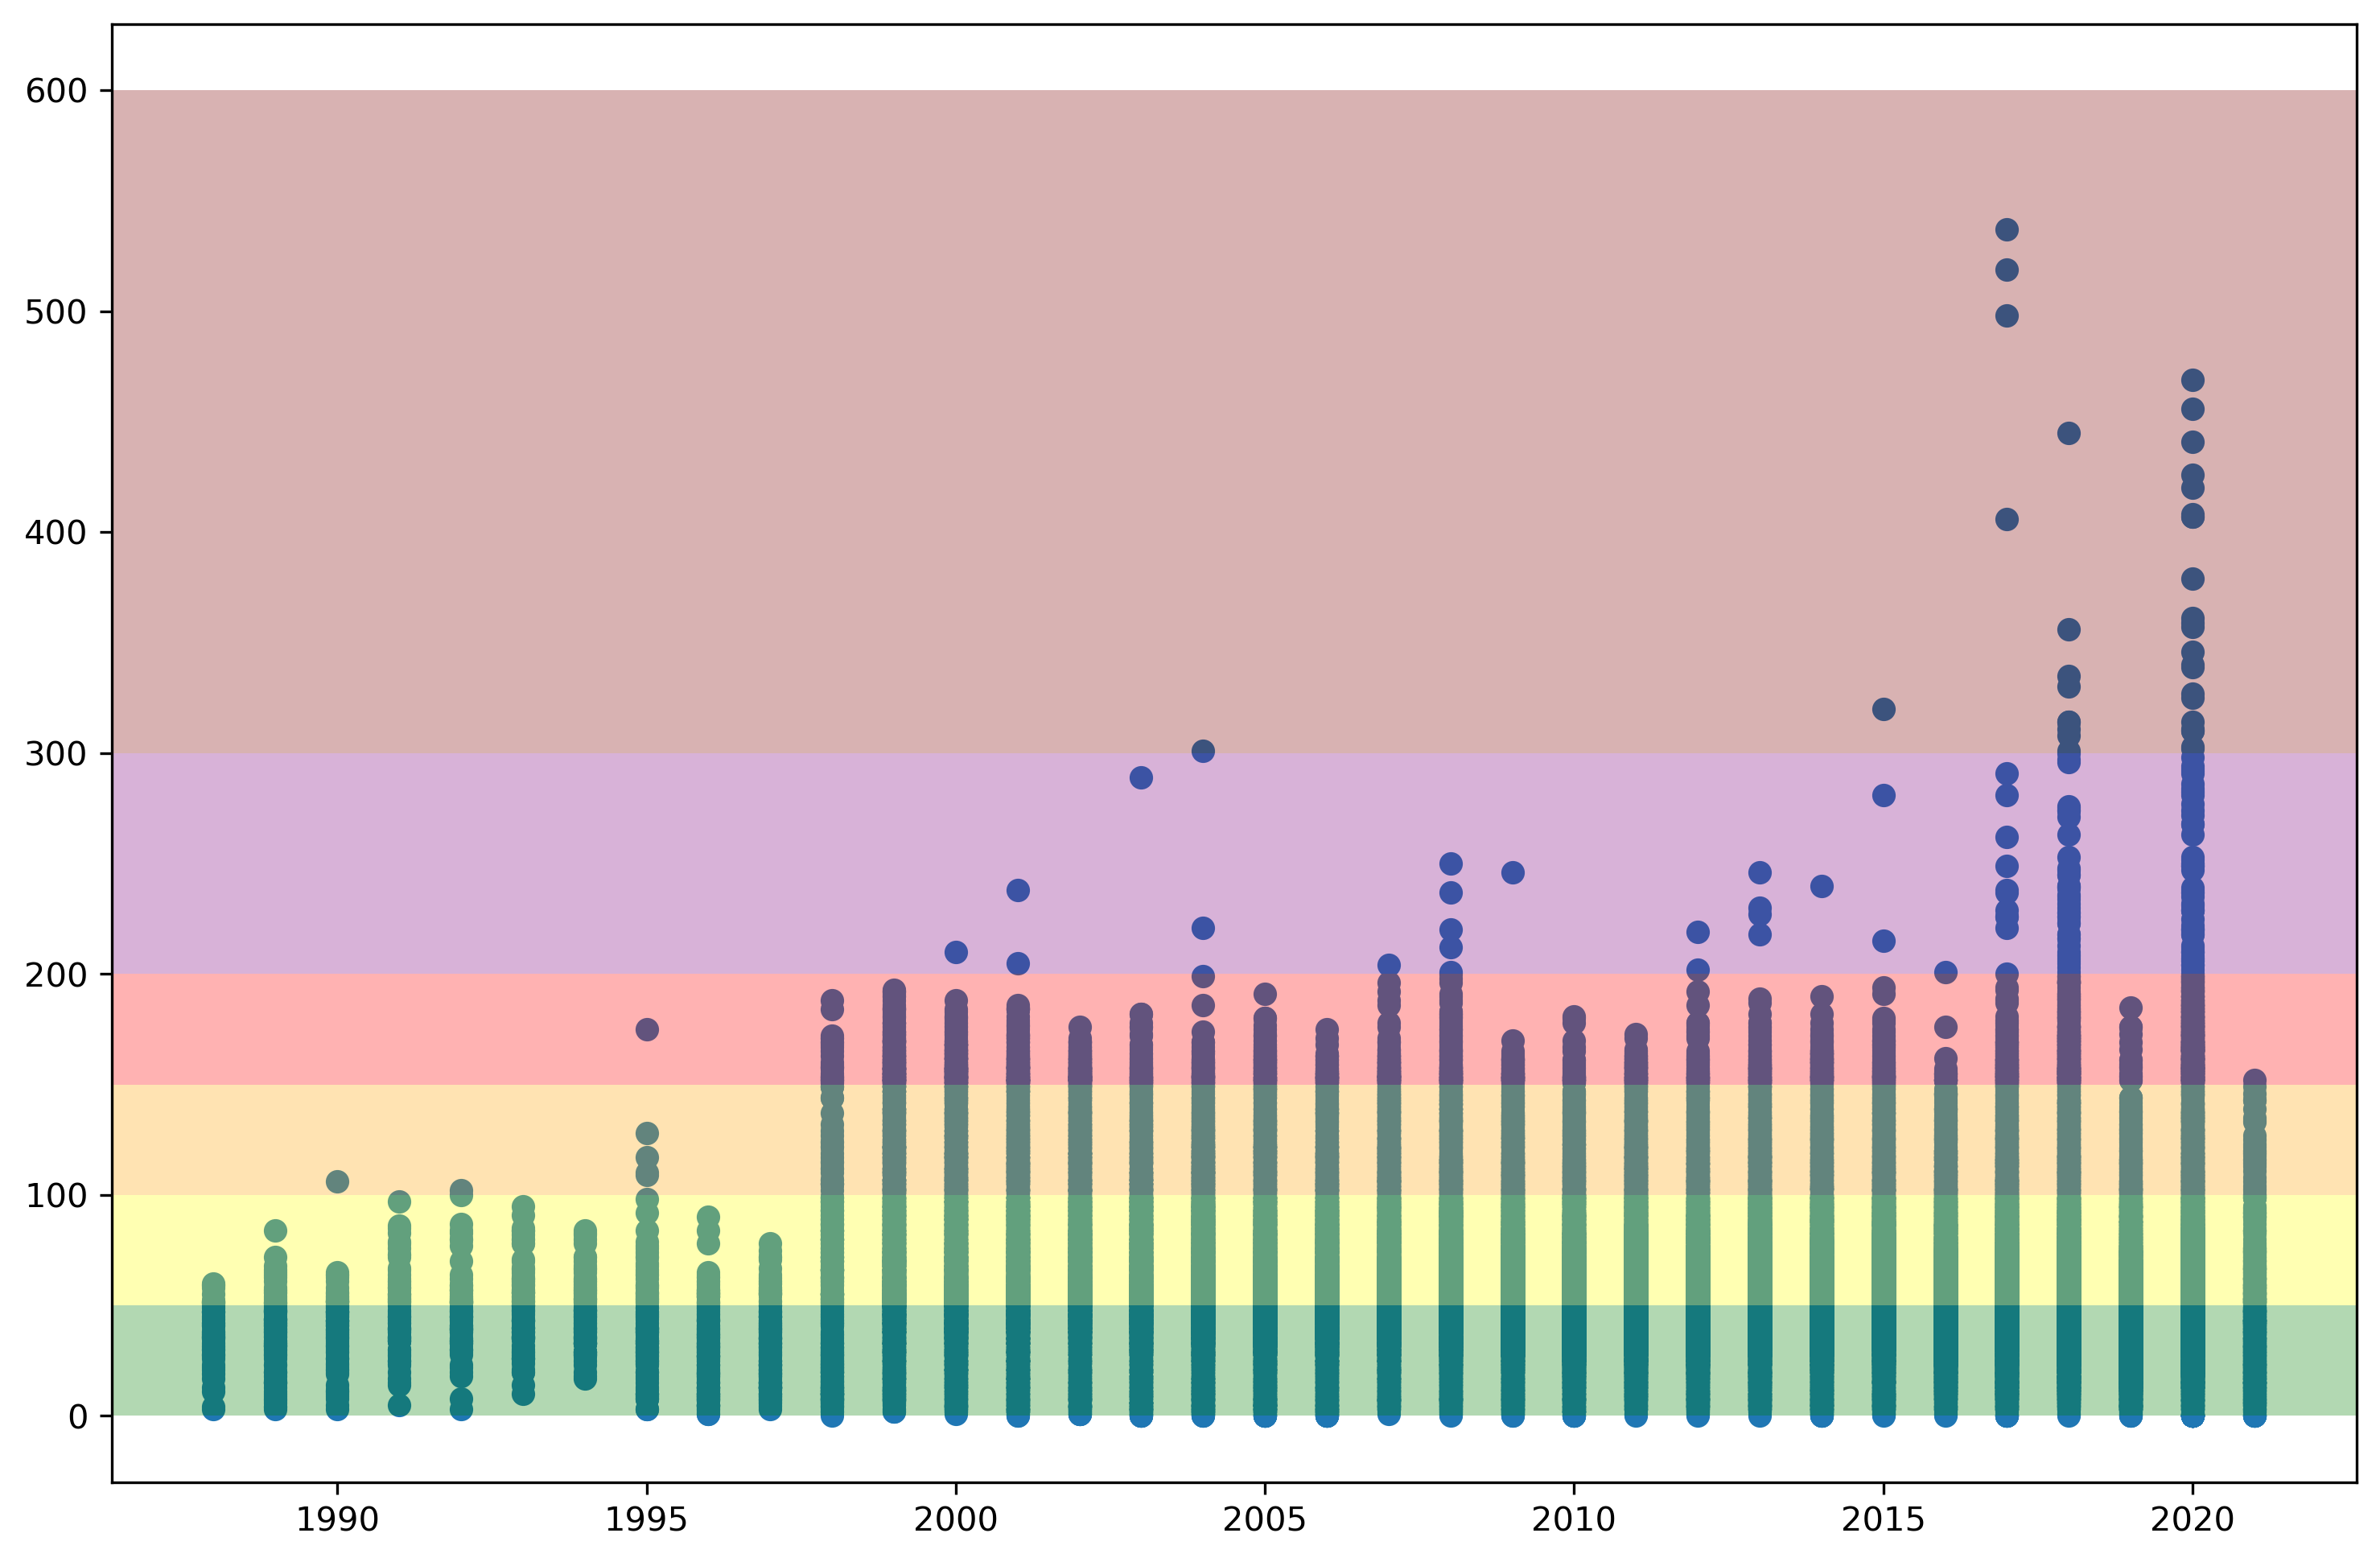

In [128]:
fig, ax = plt.subplots(figsize = (12,8), dpi = 300)

ax.axhspan(0, 50, facecolor='green', alpha=0.3)
ax.axhspan(50, 100, facecolor='yellow', alpha=0.3)
ax.axhspan(100, 150, facecolor='orange', alpha=0.3)
ax.axhspan(150, 200, facecolor='red', alpha=0.3)
ax.axhspan(200, 300, facecolor='purple', alpha=0.3)
ax.axhspan(300, 600, facecolor='maroon', alpha=0.3)

plt.scatter(aqi_ca_pm25['Year'], aqi_ca_pm25['AQI'])

## Now for just California

In [13]:
aqi_unhealthy_ca = aqi_unhealthy[aqi_unhealthy['State Name'] == 'California']
#aqi_unhealthy_ca.head()

In [14]:
counts_aqi_unhealthy_ca = aqi_unhealthy_ca.groupby('year').size().reset_index(name='count')

<AxesSubplot:title={'center':'Number of Days with an AQI above 150 in CA \nfrom 1980-2021'}, xlabel='year'>

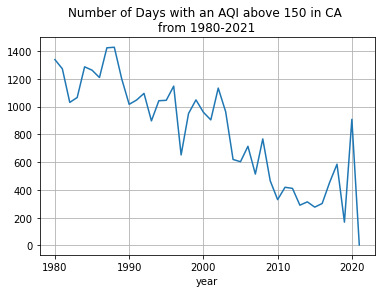

In [15]:
counts_aqi_unhealthy_ca.plot(x = 'year', 
                          y = 'count', 
                          legend = False, 
                          grid = True, 
                          title = 'Number of Days with an AQI above 150 in CA \nfrom 1980-2021')

## Now for Colorado

In [16]:
aqi_unhealthy_ca = aqi_unhealthy[aqi_unhealthy['State Name'] == 'Colorado']

In [17]:
counts_aqi_unhealthy_ca = aqi_unhealthy_ca.groupby('year').size().reset_index(name='count')

<AxesSubplot:title={'center':'Number of Days with an AQI above 150 in Colorado \nfrom 1980-2021'}, xlabel='year'>

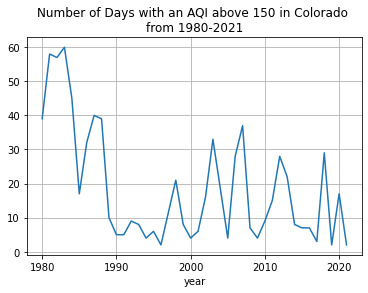

In [18]:
counts_aqi_unhealthy_ca.plot(x = 'year', 
                          y = 'count', 
                          legend = False, 
                          grid = True, 
                          title = 'Number of Days with an AQI above 150 in Colorado \nfrom 1980-2021')

## Let's see what the trend is in New York

<AxesSubplot:title={'center':'Number of Days with an AQI above 150 in New York \nfrom 1980-2021'}, xlabel='year'>

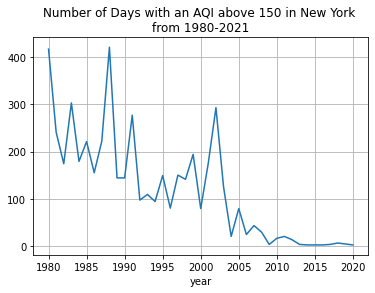

In [19]:
aqi_unhealthy_ca = aqi_unhealthy[aqi_unhealthy['State Name'] == 'New York']
counts_aqi_unhealthy_ca = aqi_unhealthy_ca.groupby('year').size().reset_index(name='count')
counts_aqi_unhealthy_ca.plot(x = 'year', 
                          y = 'count', 
                          legend = False, 
                          grid = True, 
                          title = 'Number of Days with an AQI above 150 in New York \nfrom 1980-2021')